## # Introduction
<p><img src="https://assets.datacamp.com/production/project_981/img/lego_unsplash.jpg" alt="A picture of Lego characters!"></p>
<h3 id="letslookatlegosets">Let's look at Lego sets!</h3>
<p>Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.</p>
<p>It may not be widely known, but Lego has had its share of ups and downs since its inception in the early 20th century. This includes a particularly rough period in the late 90s. As described in <a href="https://www.businessinsider.com/how-lego-made-a-huge-turnaround-2014-2?r=US&IR=T">this article</a>, Lego was only able to survive due to a successful internal brand (Bionicle) and the introduction of its first licensed series: Star Wars. In the instructions panel are the two questions you will need to answer to complete this project.</p>
<p>Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:<br><br></p>
<div style="background-color: #ebf4f7; color: #595959; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/lego_sets.csv</b></div>
<ul>
    <li><b>set_num:</b> A code that is unique to each set in the dataset. <b><i>This column is critical, and a missing value indicates the set is a duplicate or invalid!</i></b></li>
    <li><b>set_name:</b> A name for every set in the dataset (note that this can be the same for different sets).</li>
    <li><b>year:</b> The date the set was released.</li>
    <li><b>num_parts:</b> The number of parts contained in the set.<b><i> This column is not central to our analyses, so missing values are acceptable.</i></b></li>
        <li><b>theme_name:</b> The name of the sub-theme of the set.</li>
    <li><b>parent_theme:</b> The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.</li>
</ul>

<div style="font-size:20px"><b>datasets/parent_themes.csv</b></div>
<ul>
    <li><b>id:</b> A code that is unique to every theme.</li>
    <li><b>name:</b> The name of the parent theme.</li>
    <li><b>is_licensed:</b> A Boolean column specifying whether the theme is a licensed theme.</li>
</ul>
    </div>
<p>From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the two questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><em><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. In this project, you also need to know your way around <code>pandas</code> DataFrames and it's recommended that you take a look at the course <a href="https://www.datacamp.com/courses/data-manipulation-with-pandas">Data Manipulation with pandas</a>.</em></p>

In [1]:
# Use this cell to begin your analyses, and add as many cells as you would like!
import pandas as pd

df = pd.read_csv('lego_sets.csv')
parent_theme = pd.read_csv('parent_themes.csv')

In [2]:
df_merged = df.merge(parent_theme, left_on='parent_theme', right_on='name')
df_merged = df_merged.drop(columns='name_y')

In [3]:
df_merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False


In [4]:
df_merged = df_merged.rename(columns={'name_x':'name'})

In [5]:
df_merged.head()

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False


In [6]:
licensed = df_merged[df_merged['is_licensed']]
licensed.head(3)

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True


In [7]:
licensed[licensed['set_num'].isnull()]

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
11833,NaN,NaN,2017,347.0,NaN,Disney Princess,579,True
11834,NaN,NaN,2016,70.0,NaN,Disney Princess,579,True
11835,NaN,NaN,2016,NaN,NaN,Disney Princess,579,True
11836,NaN,NaN,2017,304.0,NaN,Super Heroes,482,True
11837,NaN,NaN,2017,196.0,NaN,Super Heroes,482,True
...,...,...,...,...,...,...,...,...
11981,NaN,NaN,2014,NaN,NaN,Minecraft,577,True
11982,NaN,NaN,2006,NaN,NaN,Super Heroes,482,True
11983,NaN,NaN,2017,NaN,NaN,Minecraft,577,True
11984,NaN,NaN,2017,8.0,NaN,Super Heroes,482,True


In [8]:
licensed[licensed['set_num'].isnull()].shape

(153, 8)

In [9]:
licensed = licensed.dropna(subset='set_num')

In [10]:
star_wars = licensed[licensed['parent_theme'] == 'Star Wars']
star_wars.head()

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
116,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [11]:
print('The count values of is_licensed is: ',licensed['is_licensed'].value_counts())
print()
print(star_wars['parent_theme'].value_counts())

The count values of is_licensed is:  is_licensed
True    1179
Name: count, dtype: int64

parent_theme
Star Wars    609
Name: count, dtype: int64


## Task 1: What percentage of all licensed sets ever released were Star Wars Themed?

In [12]:
the_force = star_wars.shape[0]/licensed.shape[0]
the_force

0.5165394402035624

In [15]:
the_force1 = star_wars.shape[0] / licensed.shape[0] * 100
the_force1

51.653944020356235

In [16]:
the_force2 = int(star_wars.shape[0] / licensed.shape[0] * 100)
the_force2

51

## Task 2: In which year was Star Wars not the most popular licensed theme?

In [17]:
gb = licensed.sort_values('year', ascending=True)
gb['count'] = 1
gb.head()

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed,count
7837,7141-1,Naboo Fighter,1999,179.0,Star Wars Episode 1,Star Wars,158,True,1
7845,7150-1,TIE Fighter & Y-wing,1999,NaN,Star Wars Episode 4/5/6,Star Wars,158,True,1
7847,7151-1,Sith Infiltrator,1999,244.0,Star Wars Episode 1,Star Wars,158,True,1
7815,7131-1,Anakin's Podracer,1999,136.0,Star Wars Episode 1,Star Wars,158,True,1
7856,7161-1,Gungan Sub,1999,379.0,Star Wars Episode 1,Star Wars,158,True,1


In [18]:
summed_df = gb.groupby(['year','parent_theme']).sum().reset_index()
summed_df.head()

,year,parent_theme,set_num,name,num_parts,theme_name,id,is_licensed,count
0,1999,Star Wars,7141-17150-17151-17131-17161-17130-17171-17128...,Naboo FighterTIE Fighter & Y-wingSith Infiltra...,1384.0,Star Wars Episode 1Star Wars Episode 4/5/6Star...,2054,13,13
1,2000,Disney's Mickey Mouse,4178-14167-14166-14165-14164-1,Mickey's Fishing AdventureMickey's MansionMick...,405.0,Disney's Mickey MouseDisney's Mickey MouseDisn...,1940,5,5
2,2000,Star Wars,7134-13341-1VP-87104-14151270-13343-13342-1712...,A-wing FighterStar Wars #2 - Luke/Han/Boba Min...,2580.0,Star Wars Episode 4/5/6Star Wars Episode 4/5/6...,4108,26,26
3,2001,Harry Potter,4702-14701-14704-14705-14722-14707-14708-14709...,The Final ChallengeSorting HatThe Chamber of t...,1284.0,Sorcerer's StoneSorcerer's StoneSorcerer's Sto...,2706,11,11
4,2001,Star Wars,7146-18008-1VP-28007-165028-165030-165034-1710...,TIE FighterStormtrooper™Star Wars Co-Pack of 7...,2949.0,Star Wars Episode 4/5/6Star WarsStar Wars Epis...,2212,14,14


In [19]:
col = ['set_num','name','theme_name']
df_sorted = summed_df.drop(col,axis=1)

In [20]:
df_sorted = df_sorted.sort_values('count', ascending=False).drop_duplicates(['year'])
df_sorted

,year,parent_theme,num_parts,id,is_licensed,count
82,2017,Super Heroes,13123.0,34704,72,72
76,2016,Star Wars,6934.0,9638,61,61
67,2015,Star Wars,11410.0,9164,58,58
59,2014,Star Wars,8293.0,7110,45,45
47,2012,Star Wars,6769.0,6794,43,43
32,2009,Star Wars,3953.0,6162,39,39
52,2013,Star Wars,6159.0,5530,35,35
9,2003,Star Wars,6660.0,5056,32,32
42,2011,Star Wars,3451.0,5056,32,32
36,2010,Star Wars,6003.0,4740,30,30


In [21]:
df_sorted.groupby(['year'])[['parent_theme']].min()

,parent_theme
year,
1999,Star Wars
2000,Star Wars
2001,Star Wars
2002,Star Wars
2003,Star Wars
2004,Star Wars
2005,Star Wars
2006,Star Wars
2007,Star Wars


In [22]:
new_era = 2017

## Bonus Task: How many unique sets were released each year (1955-2017)?

In [23]:
df1 = df.merge(parent_theme, left_on='parent_theme', right_on='name')
df1 = df1.drop(columns='name_y')
df1.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False


In [24]:
df1 = df1.rename(columns={'name_x':'name'})

In [25]:
licensed = df1[df1['is_licensed']]
licensed

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
95,10075-1,Spider-Man Action Pack,2002,25.0,Spider-Man,Super Heroes,482,True
...,...,...,...,...,...,...,...,...
11981,NaN,NaN,2014,NaN,NaN,Minecraft,577,True
11982,NaN,NaN,2006,NaN,NaN,Super Heroes,482,True
11983,NaN,NaN,2017,NaN,NaN,Minecraft,577,True
11984,NaN,NaN,2017,8.0,NaN,Super Heroes,482,True


In [34]:
clean_df = df1[~df1['set_num'].isnull()]
clean_df.loc[:,'count'] = 1
clean_df.head()

/var/folders/rk/vsbmyjqx09n87m8t22syxyvr0000gn/T/ipykernel_6086/2519267103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.loc[:,'count'] = 1


,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed,count
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False,1
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False,1
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False,1
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False,1
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False,1


In [35]:
clean_df[clean_df['year'] <= 1999]

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed,count
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False,1
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False,1
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False,1
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False,1
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False,1
...,...,...,...,...,...,...,...,...,...
11815,VP-17,Legoland Town Special Offer,1985,0.0,Classic Town,Town,50,False,1
11819,VP-5,UFO Value Pack,1997,3.0,UFO,Space,126,False,1
11821,VP-7,Fire Value Pack (6554 6407 6564),1997,NaN,Fire,Town,50,False,1
11824,vwkit-1,Volkswagen Kit,1959,22.0,Basic Set,Classic,365,False,1


In [36]:
sets_per_year = clean_df.groupby(['year']).sum(numeric_only=True).reset_index()[['year','num_parts','count']]
sets_per_year

,year,num_parts,count
0,1950,26.0,7
1,1953,1.0,4
2,1954,122.0,14
3,1955,813.0,28
4,1956,107.0,12
...,...,...,...
61,2013,55435.0,593
62,2014,68273.0,715
63,2015,81808.0,670
64,2016,78678.0,608


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
year = sets_per_year['year']
count = sets_per_year['count']

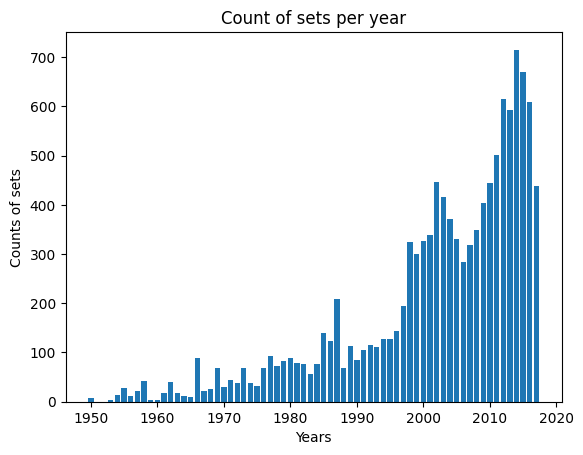

In [40]:
plt.bar(year, count)
plt.xlabel('Years')
plt.ylabel('Counts of sets')
plt.title('Count of sets per year')
plt.show()